In [1]:


import pandas as pd

# Read the datasets
df_news = pd.read_csv('../data/sentiment.csv')
df_stock = pd.read_csv('../data/stock_data.csv')
     


In [2]:
df_news.head()

,Date,headline,neg,neu,pos,compound,Sentiment,stock
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2,2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive,A


In [3]:


# Set 'Date' and 'stock' column as part of the index
df_stock = df_stock.set_index('Date')
df_stock = df_stock.set_index('stock', append=True)
df_news = df_news.set_index('Date')
df_news = df_news.set_index('stock', append=True)
     


In [4]:


# Align the datasets by Date and Stock
aligned_data = pd.merge(df_stock, df_news, 
                        left_index=True, 
                        right_index=True, 
                        how='inner')
     


In [5]:
# Check the result with the first five rows
aligned_data.head()

Open    High      Low    Close       Volume  \
Date       stock                                                   
2020-06-10 AAPL   84.6554  86.327  84.2159  85.8578  171215704.0   
           AAPL   84.6554  86.327  84.2159  85.8578  171215704.0   
           AAPL   84.6554  86.327  84.2159  85.8578  171215704.0   
           AAPL   84.6554  86.327  84.2159  85.8578  171215704.0   
           AAPL   84.6554  86.327  84.2159  85.8578  171215704.0   

                  Daily_Return  Cumulative_Return  \
Date       stock                                    
2020-06-10 AAPL       0.050409           0.668482   
           AAPL       0.050409           0.668482   
           AAPL       0.050409           0.668482   
           AAPL       0.050409           0.668482   
           AAPL       0.050409           0.668482   

                                                           headline  neg  \
Date       stock                                                           
2020-06-10 AAPL   Tech Stocks And FAANGS Strong Again To Start D...  0.0   
           AAPL       10 Biggest Price Target Changes For Wednesday  0.0   
           AAPL   Benzinga Pro's Top 5 Stocks To Watch For Wed.,...  0.0   
           AAPL   Deutsche Bank Maintains Buy on Apple, Raises P...  0.0   
           AAPL   Apple To Let Users Trade In Their Mac Computer...  0.0   

                    neu    pos  compound Sentiment  
Date       stock                                    
2020-06-10 AAPL   0.705  0.295    0.5574  Positive  
           AAPL   1.000  0.000    0.0000   Neutral  
           AAPL   0.893  0.107    0.2023  Positive  
           AAPL   1.000  0.000    0.0000   Neutral  
           AAPL   0.852  0.148    0.3818  Positive

In [6]:

# Check size
aligned_data.shape
     

(49, 13)

In [7]:

# Check missing
aligned_data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
Daily_Return         0
Cumulative_Return    0
headline             0
neg                  0
neu                  0
pos                  0
compound             0
Sentiment            0
dtype: int64

In [8]:
# Check the data types
aligned_data.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Daily_Return         float64
Cumulative_Return    float64
headline              object
neg                  float64
neu                  float64
pos                  float64
compound             float64
Sentiment             object
dtype: object

In [9]:


# Ensure 'Date' is in datetime format if not already
aligned_data.index = pd.MultiIndex.from_frame(aligned_data.index.to_frame().assign(Date=pd.to_datetime(aligned_data.index.get_level_values('Date'))))

# Calculate average daily sentiment scores
sentiment_cols = ['neg', 'neu', 'pos', 'compound']
daily_sentiment = aligned_data.groupby(level=['Date', 'stock'])[sentiment_cols].mean()

# Reset index for merging purposes
daily_sentiment = daily_sentiment.reset_index()
     


In [10]:

# Save it to csv
daily_sentiment.to_csv('../data/daily_sentiment.csv')
daily_sentiment

,Date,stock,neg,neu,pos,compound
0,2020-06-02,NVDA,0.000000,0.821000,0.179000,0.220200
1,2020-06-04,GOOG,0.000000,1.000000,0.000000,0.000000
2,2020-06-05,GOOG,0.189667,0.810333,0.000000,-0.411033
3,2020-06-08,GOOG,0.060000,0.759000,0.182000,0.542300
4,2020-06-08,NVDA,0.041333,0.880667,0.078000,0.168667
5,2020-06-09,AAPL,0.000000,0.928000,0.072000,0.246900
6,2020-06-09,AMZN,0.125000,0.658750,0.216250,0.077775
7,2020-06-09,GOOG,0.000000,1.000000,0.000000,0.000000
8,2020-06-09,NVDA,0.000000,0.746000,0.254000,0.729600
9,2020-06-10,AAPL,0.000000,0.888667,0.111333,0.198850


In [11]:

daily_retun = aligned_data.reset_index()
print(daily_retun[['Date', 'stock', 'Close', 'Daily_Return']])

         Date stock      Close  Daily_Return
0  2020-06-10  AAPL   85.85780      0.050409
1  2020-06-10  AAPL   85.85780      0.050409
2  2020-06-10  AAPL   85.85780      0.050409
3  2020-06-10  AAPL   85.85780      0.050409
4  2020-06-10  AAPL   85.85780      0.050409
5  2020-06-10  AAPL   85.85780      0.050409
6  2020-06-09  AAPL   83.70450     -0.025080
7  2020-06-09  AAPL   83.70450     -0.025080
8  2020-06-09  AAPL   83.70450     -0.025080
9  2020-06-09  AAPL   83.70450     -0.025080
10 2020-06-10  AMZN  132.37200      0.034981
11 2020-06-10  AMZN  132.37200      0.034981
12 2020-06-10  AMZN  132.37200      0.034981
13 2020-06-10  AMZN  132.37200      0.034981
14 2020-06-10  AMZN  132.37200      0.034981
15 2020-06-10  AMZN  132.37200      0.034981
16 2020-06-09  AMZN  130.04300     -0.017594
17 2020-06-09  AMZN  130.04300     -0.017594
18 2020-06-09  AMZN  130.04300     -0.017594
19 2020-06-09  AMZN  130.04300     -0.017594
20 2020-06-10  GOOG   73.29250      0.044172
21 2020-06

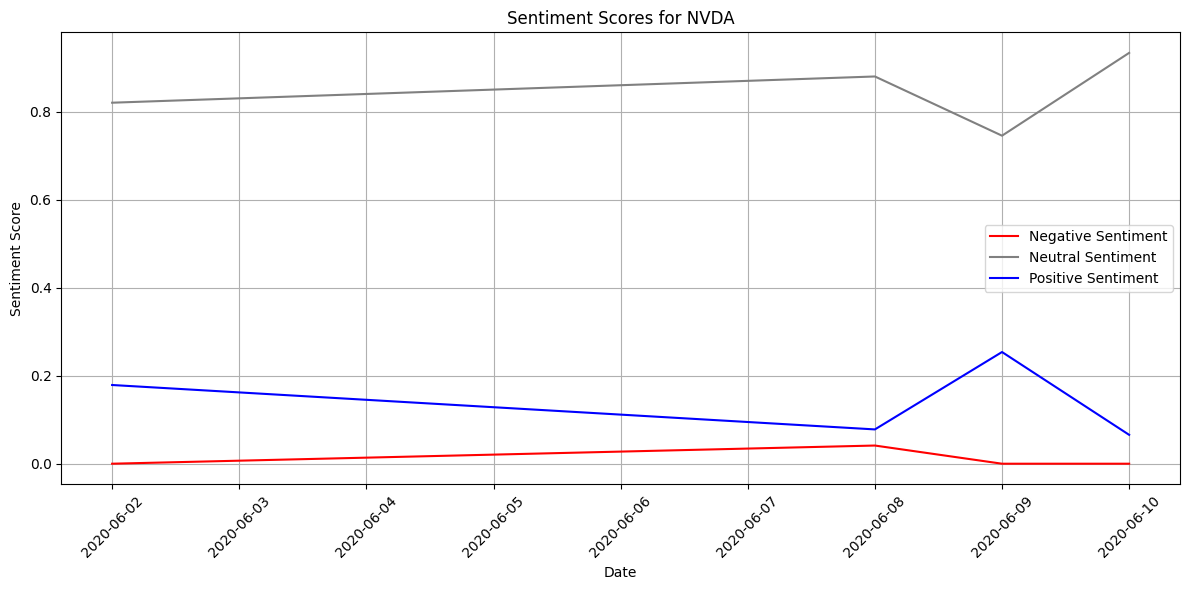

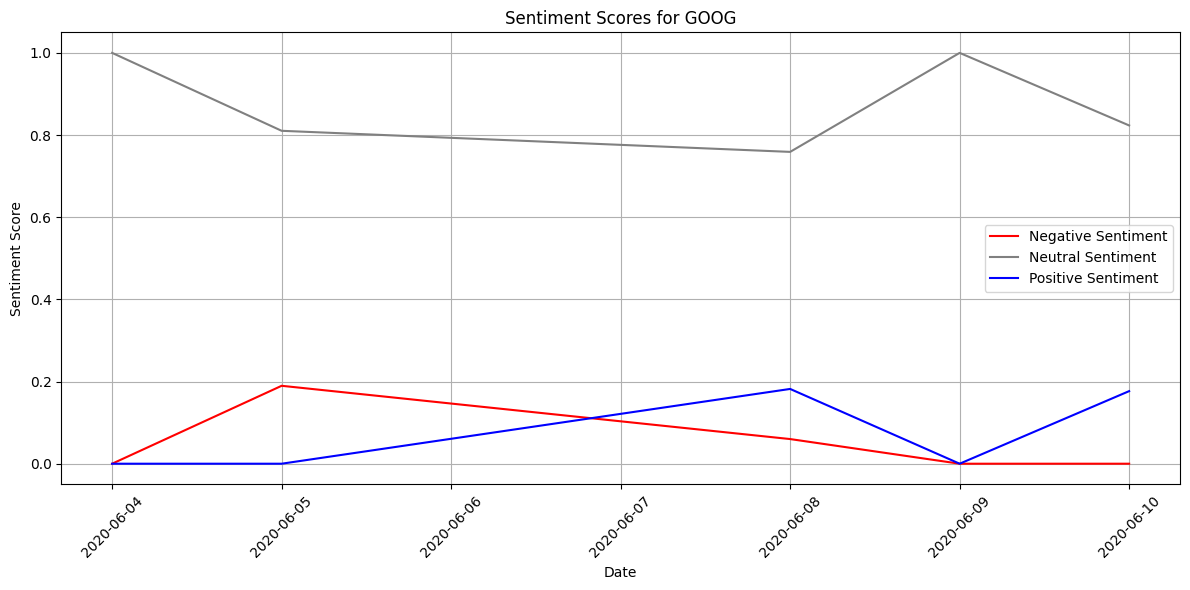

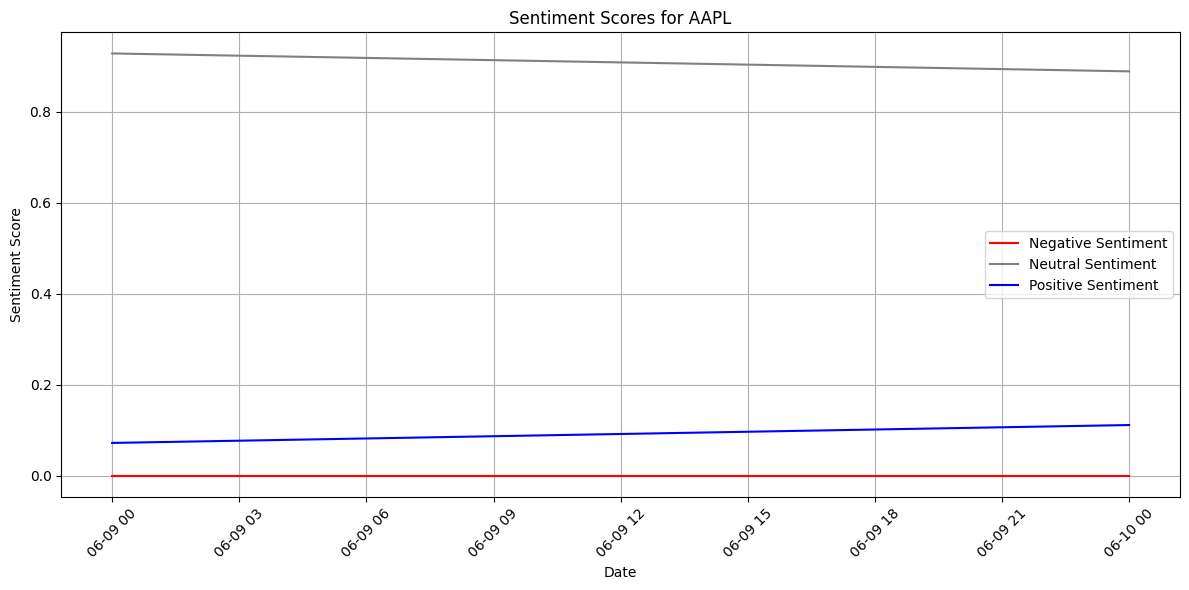

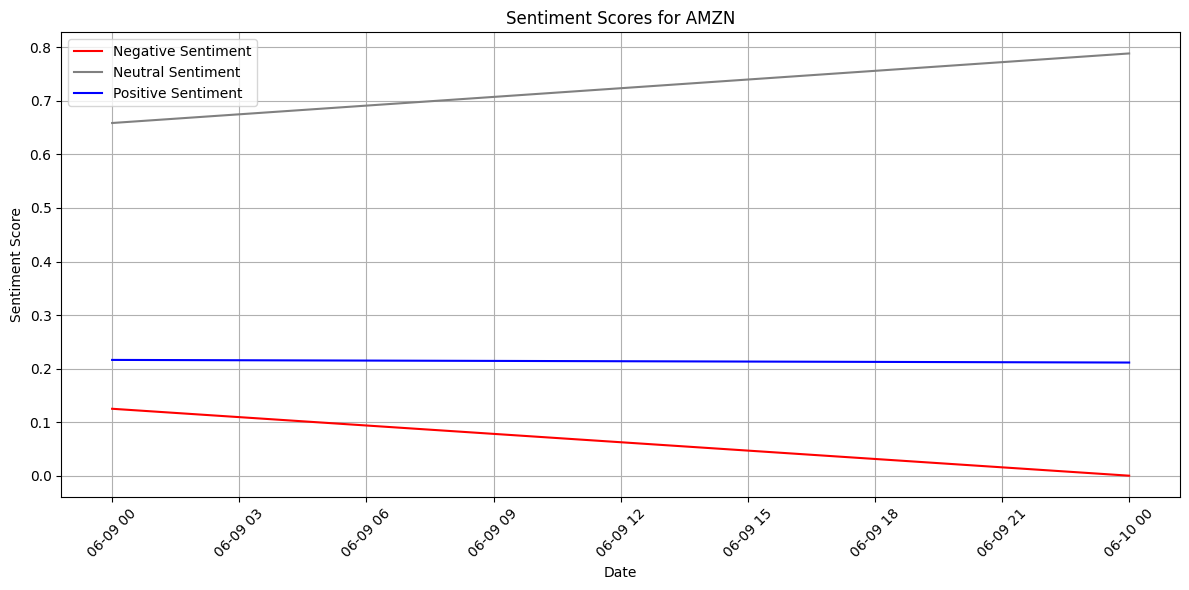

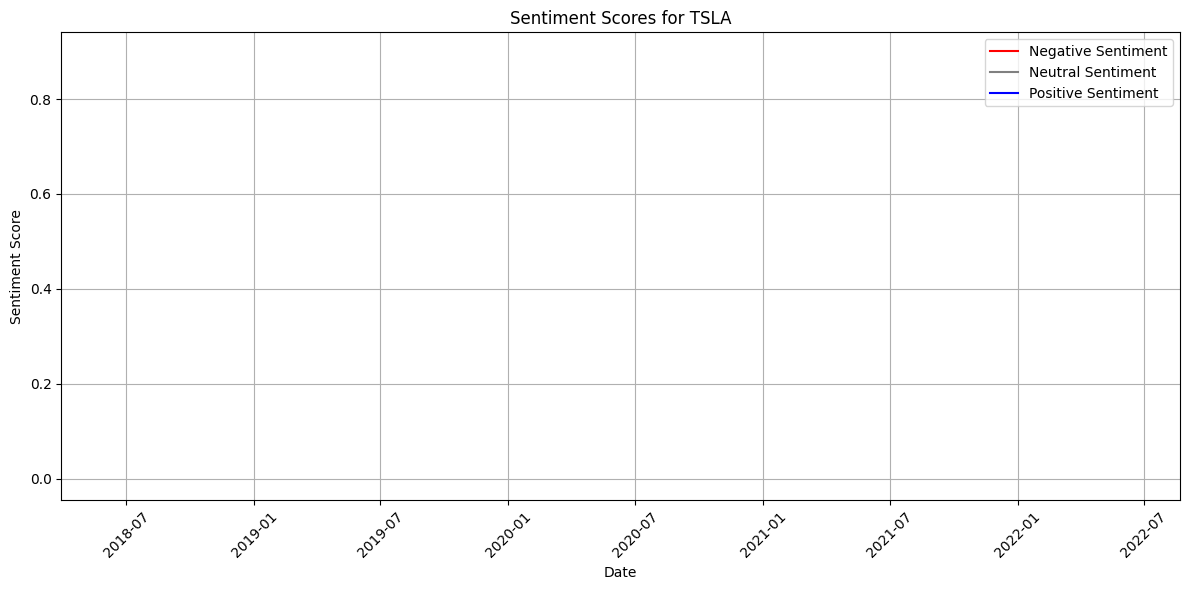

In [12]:
# Plot sentiment scores for each stock
import matplotlib.pyplot as plt
stocks = daily_sentiment['stock'].unique()

for stock in stocks:
    stock_data = daily_sentiment[daily_sentiment['stock'] == stock]
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['neg'], label='Negative Sentiment', color='red')
    plt.plot(stock_data['Date'], stock_data['neu'], label='Neutral Sentiment', color='gray')
    plt.plot(stock_data['Date'], stock_data['pos'], label='Positive Sentiment', color='blue')
    #plt.plot(stock_data['Date'], stock_data['compound'], label='Compound Sentiment', color='blue')
    
    plt.title(f'Sentiment Scores for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:

def calculate_correlation(df):
    # Assuming 'Daily_Return' is already calculated in your DataFrame
    sentiment_cols = ['neg', 'neu', 'pos', 'compound']
    
    # Calculate the correlation between sentiment scores and daily returns
    correlations = {}
    for col in sentiment_cols:
        correlation = df[col].corr(df['Daily_Return'])
        correlations[col] = correlation
    
    # Convert the correlations to a DataFrame for better visualization
    correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Daily Return'])
    
    return correlation_df

# Let's calculate the daily correlation of apple
df = aligned_data.reset_index()
correlation_df = calculate_correlation(df[df['stock']=='AAPL'])
print(correlation_df)
     

          Correlation with Daily Return
neg                                 NaN
neu                           -0.209570
pos                            0.209570
compound                      -0.103438


d:\Financial-and-Stock\myenv\lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Financial-and-Stock\myenv\lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
